In [1]:
import main
from main import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import processing
import models
import evaluation
import dim_reduction as dr
import generative as gen

import torch
import numpy as np
import IPython

import scipy
from scipy import stats

from processing import Processing
from models import LinearRegression, RandomForest, TrainRNN
from evaluation import Evaluation
from IPython import embed

- read in the data
- random train/test split
- compute one hot embeddings
- compute index-based representation for (each character maps to an integer)
- instantiate eval class

In [2]:
########### initial processing #########
csv_file = 'challenge.txt'
# read in data
proc = Processing(csv_file)

# train / test split
trainX, testX, trainY, testY = proc.train_test_split(proc.seq, proc.y)

# compute one hot embedding
trainOneHotX, testOneHotX = proc.sequences_to_one_hot(trainX), proc.sequences_to_one_hot(testX)

# compute seq to inds
trainIndsX, testIndsX = proc.seq_matrix_to_inds(trainX), proc.seq_matrix_to_inds(testX)

# initialize metrics object
metrics = Evaluation()

train a linear regressor on the one hot representation

In [3]:
# # one hot regression
linReg = one_hot_regression(proc=proc,
                   data=(trainOneHotX, trainY, testOneHotX, testY),
                   metrics=metrics)


one hot regression...
ridge regression with one hot representation...
('test r2 score: ', 0.6159358812675876)
('test mse: ', 0.3966881508266706)


train a neural regressor (1 layer forward rnn). in this case, we will use a saved model instead of training from scratch

In [4]:
# neural regression
net, rnn = neural_regression(proc=proc,
                  data=(trainIndsX, trainY, testIndsX, testY),
                  metrics=metrics,
                  trainRNN=False,
                  model_path='rnn_output/model_6000iter_validlosspt250.pth')

neural regression...


/Users/farhan.damani/anaconda2/envs/denoising_autoencoders_env/lib/python2.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/farhan.damani/anaconda2/envs/denoising_autoencoders_env/lib/python2.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.GRU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/farhan.damani/anaconda2/envs/denoising_autoencoders_env/lib/python2.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code o

('train r2 score: ', 0.7838665837441313)
('test r2 score: ', 0.7546271813083641)


pca on neural embeddings and one hot representation.
- lets plot explained variance ratio as a function of principal components to compare a neural and one hot basis
- lets then plot the neural and one hot embeddings in 2 pc dimensions 

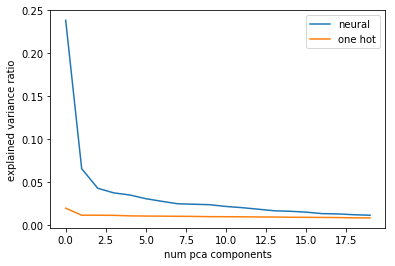

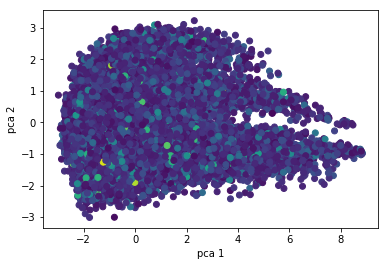

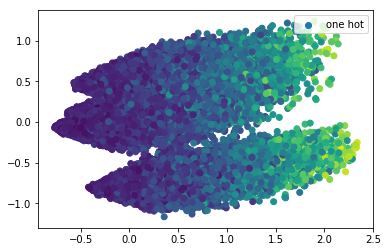

In [5]:
############################ PCA on one hot and neural embedding ############################
oneHotPCA_2d = pca(data=(trainOneHotX, testOneHotX, testX, trainY, testY), net=net, proc=proc, showplot=True)

we will now show results for three generative models:
- fully factorized multinomial: $p(x) = p(x_1)p(x_2)p(x3)...p(x_T)$
- AR-1 with shared parameters $p(x) = p(x_1; \phi)p(x_2|x_1; \theta)p(x_3|x_2; \theta)...p(x_T|x_{T-1}; \theta)$
- AR-1 with independent parameters per time-step $p(x) = p(x_1; \phi)p(x_2|x_1; \theta_1)p(x_3|x_2; \theta_2)...p(x_T|x_{T-1}; \theta_{T-1})$

with three different goals:
- generation of training data
- generate data that scores high on the fitness function
- generates data that scores low on the fitness function

for each generative model and for each goal, we will plot histograms for the generated data's scores (under a neural model and linear model) vs the training data

('threshold: ', -1000)
independent mult...
('percent novel: ', 1)
/gen_model_independent_multinomial_neuralPreds.png


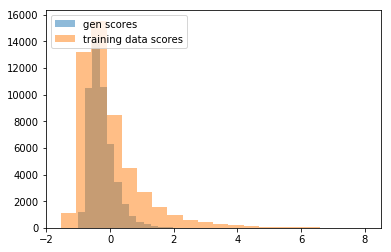

/gen_model_independent_multinomial_linRegPreds.png


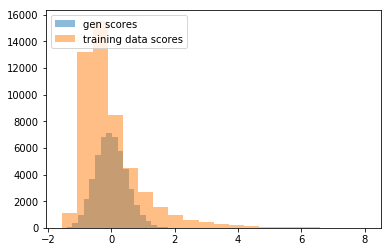

('neural prediction mean: ', -0.26675907, 0.39415246)
ar1 shared...
('percent novel: ', 1)
/gen_model_ar1_shared_params_neuralPreds.png


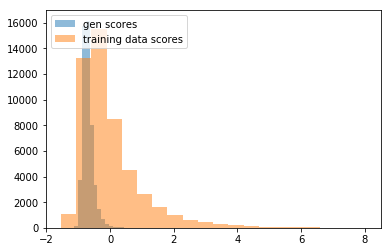

/gen_model_ar1_shared_params_linRegPreds.png


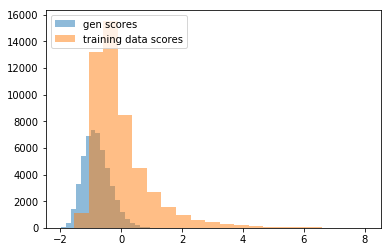

('neural prediction mean: ', -0.6951588, 0.170271)
ar1 no shared...
('percent novel: ', 1)
/gen_model_ar1_no_shared_params_neuralPreds.png


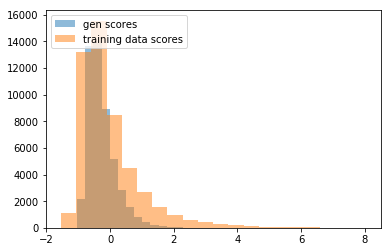

/gen_model_ar1_no_shared_params_linRegPreds.png


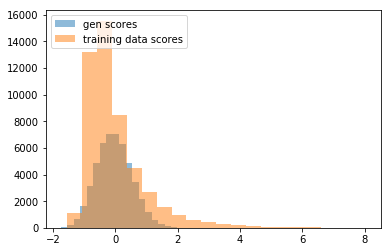

('neural prediction mean: ', -0.25777748, 0.45112172)
('threshold: ', 3.5)
independent mult...
('percent novel: ', 0)
/gen_model_independent_multinomial_neuralPreds.png


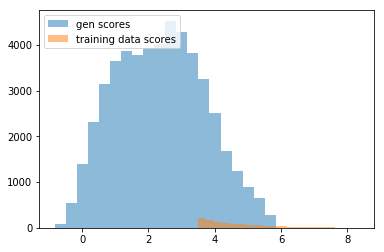

/gen_model_independent_multinomial_linRegPreds.png


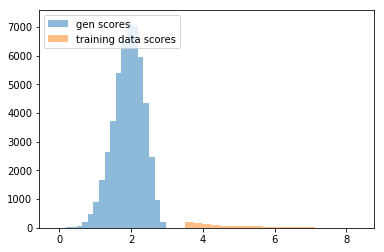

('neural prediction mean: ', 2.356877, 1.3465109)
ar1 shared...
('percent novel: ', 1)
/gen_model_ar1_shared_params_neuralPreds.png


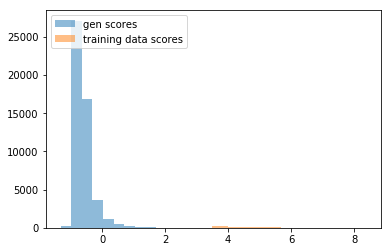

/gen_model_ar1_shared_params_linRegPreds.png


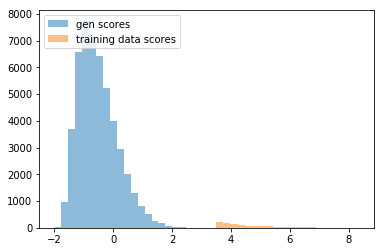

('neural prediction mean: ', -0.5838912, 0.33018348)
ar1 no shared...
('percent novel: ', 0)
/gen_model_ar1_no_shared_params_neuralPreds.png


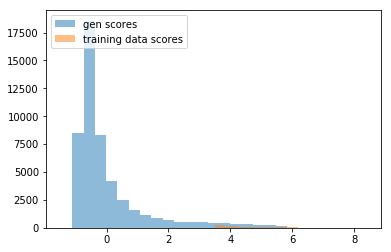

/gen_model_ar1_no_shared_params_linRegPreds.png


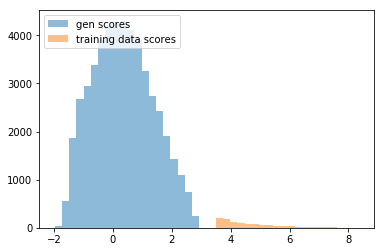

('neural prediction mean: ', 0.021569107, 1.1993475)
('threshold: ', -0.5)
independent mult...
('percent novel: ', 1)
/gen_model_independent_multinomial_neuralPreds.png


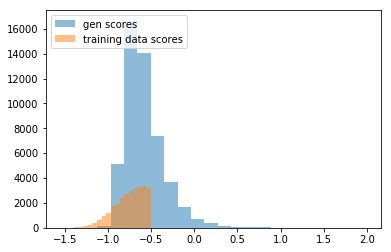

/gen_model_independent_multinomial_linRegPreds.png


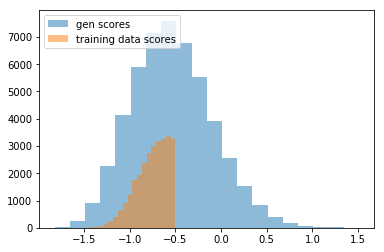

('neural prediction mean: ', -0.58232474, 0.22911595)
ar1 shared...
('percent novel: ', 1)
/gen_model_ar1_shared_params_neuralPreds.png


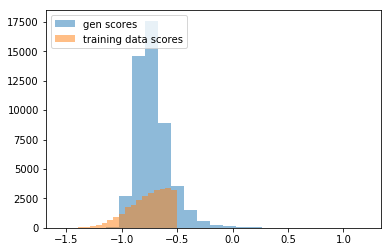

/gen_model_ar1_shared_params_linRegPreds.png


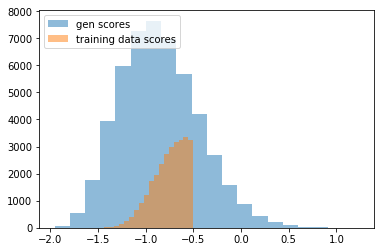

('neural prediction mean: ', -0.7181725, 0.15323058)
ar1 no shared...
('percent novel: ', 1)
/gen_model_ar1_no_shared_params_neuralPreds.png


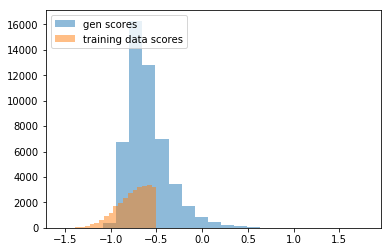

/gen_model_ar1_no_shared_params_linRegPreds.png


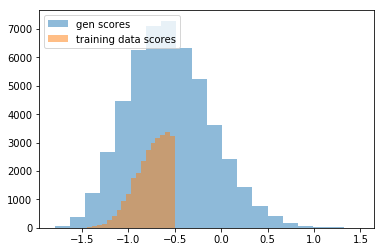

('neural prediction mean: ', -0.5921584, 0.2277467)


In [13]:
############################ generative modeling ############################
thresholds = [-1000, 3.5, -.5]
models = ['independent', 'ar1_shared', 'ar1_noshare']
model_data = {}
for mod in models:
    model_data[mod] = []

for i in range(len(thresholds)):
    print('threshold: ', thresholds[i])
    # limit to samples above threshold
    y_thresh = thresholds[i]
    if y_thresh == -.5:
        topY, topX = trainY[trainY < y_thresh], trainX[trainY < y_thresh]
    else:
        topY, topX = trainY[trainY > y_thresh], trainX[trainY > y_thresh]

    # randomly select a subset
    numCompounds = 50000
    rand_inds = np.random.permutation(np.arange(len(topY)))
    topY, topX = topY[rand_inds[0:numCompounds]], topX[rand_inds[0:numCompounds]]

    print('independent mult...')
    filename = '/gen_model_independent_multinomial'
    params, neuralPreds, linPreds, novelSeqs = run_generative_model(gen.IndependentMult(), topX, topY, proc, metrics, linReg, net, rnn, numCompounds, filename, showplot=True)
    model_data['independent'].append((params, neuralPreds, linPreds, novelSeqs))
    print('neural prediction mean: ', np.mean(neuralPreds), np.std(neuralPreds))

    print('ar1 shared...')
    filename = '/gen_model_ar1_shared_params'
    params, neuralPreds, linPreds, novelSeqs = run_generative_model(gen.Ar1Shared(), topX, topY, proc, metrics, linReg, net, rnn, numCompounds, filename, showplot=True)
    model_data['ar1_shared'].append((params, neuralPreds, linPreds, novelSeqs))

    print('neural prediction mean: ', np.mean(neuralPreds), np.std(neuralPreds))

    print('ar1 no shared...')
    filename = '/gen_model_ar1_no_shared_params'
    params, neuralPreds, linPreds, novelSeqs = run_generative_model(gen.Ar1NoShare(), topX, topY, proc, metrics, linReg, net, rnn, numCompounds, filename, showplot=True)
    model_data['ar1_noshare'].append((params, neuralPreds, linPreds, novelSeqs))
    print('neural prediction mean: ', np.mean(neuralPreds), np.std(neuralPreds))


lets print a few of the top scoring sequences

### top scoring compounds generated...

independent model:

In [14]:
neural_preds = model_data['independent'][1][1]
seqs = model_data['independent'][1][3]
print(neural_preds[np.argsort(neural_preds)[::-1]][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[5.847367  5.833022  5.833022  5.829497  5.829497  5.829497  5.829497
 5.829497  5.8271832 5.8244724 5.8244724 5.818543  5.816122  5.80674
 5.8055134 5.8024864 5.790757  5.77394   5.769408  5.7508802]
[['VEMQPFKWGLQR']
 ['KDTPPWRMGLEQ']
 ['MDTQEWKMMQEC']
 ['INTQNWRFGLEQ']
 ['KDTQCFTFILQQ']
 ['RNTQPWRWGLQQ']
 ['ILTQCWKFGLQQ']
 ['IDTPMSKFWAIQ']
 ['MDTACFRMEVQQ']
 ['IYTQPWMWELQF']
 ['RYTPPFTMGLQR']
 ['VETPEWEWTHQQ']
 ['MDTLFWKWGNQQ']
 ['RDYVEFRMEVQR']
 ['MDTQCIRFGLED']
 ['DYTQPWRCEVQQ']
 ['KDIQCWQWGLQR']
 ['MQEMCQRMENQR']
 ['RNTCPWDFEQQQ']
 ['DSILPFRALLQQ']]


ar1 shared parameter model:

In [15]:
neural_preds = model_data['ar1_shared'][1][1]
seqs = model_data['ar1_shared'][1][3]
print(neural_preds[np.argsort(neural_preds)[::-1]][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[5.3688526 5.246211  4.9873033 4.966007  4.9496984 4.7993603 4.7665267
 4.5352235 4.459867  4.152643  4.1447783 4.081401  3.9956326 3.9578435
 3.796089  3.5655243 3.470084  3.3501098 3.3227522 3.3145263]
[['HYTAPRFELQPW']
 ['KNQTLQCWDRWE']
 ['IFWEFGYTCWGH']
 ['ELFGLQRFAGYT']
 ['IYWKVNQMLQQQ']
 ['IYTMKSAERFLQ']
 ['VCSTPWAGLELQ']
 ['DMGNNPRKFGLQ']
 ['IGHQPYTQCWQC']
 ['HNQPPWRWQRWR']
 ['RRFELEVDTPWD']
 ['WNLELNCFEHQQ']
 ['KFGLQQQGLQAY']
 ['VQRFRMELPWRF']
 ['DYTCWQFEMCWK']
 ['AELQQFATCELP']
 ['IQQQCRAEHTMM']
 ['DTCIYTPQAELQ']
 ['VEQCMGLDTFWQ']
 ['MECWKFGLNTQP']]


ar1 per time-step parameters

In [16]:
neural_preds = model_data['ar1_noshare'][1][1]
seqs = model_data['ar1_noshare'][1][3]
print(neural_preds[np.argsort(neural_preds)[::-1]][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[5.818543  5.818543  5.818543  5.816122  5.816122  5.799751  5.767047
 5.7425013 5.7310114 5.721281  5.7170634 5.715173  5.715147  5.710291
 5.7085295 5.7049637 5.7045603 5.6967874 5.692931  5.6906366]
[['KYTPPPSCLVQQ']
 ['RDISPWIITQIG']
 ['MYIGDNTFMLKC']
 ['WIDTCWRWELQC']
 ['WYTQPWMDHLQQ']
 ['HDTPPFSVHTSS']
 ['WWGMIYVILDWR']
 ['VYTQSCPLGVQR']
 ['VMSRHMAWKFHP']
 ['HMRHAYSMAHQT']
 ['VNTCPWKFYYMD']
 ['VYHCMNFQNRTL']
 ['DIIRQTCTHFTW']
 ['WDTQVMFVQDPQ']
 ['KNTQPWIFELNQ']
 ['RMYMEDQMCSWK']
 ['AVYDSPGQNDCR']
 ['KDMQPPKCNMGP']
 ['RSSLRYGNKTYE']
 ['MSIQPFKNFWFW']]


### low scoring compounds generated...

In [17]:
neural_preds = model_data['independent'][2][1]
seqs = model_data['independent'][2][3]
print(neural_preds[np.argsort(neural_preds)][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[-1.1237005 -1.0524276 -1.0440198 -1.0434821 -1.039842  -1.039577
 -1.0361847 -1.033255  -1.0329249 -1.0311441 -1.0296559 -1.0255699
 -1.0255622 -1.0254759 -1.022633  -1.0203327 -1.0184665 -1.0175484
 -1.0168828 -1.0163692]
[['TSYSFHEEEMER']
 ['CANAEWKFEPSE']
 ['LQQIQADRFPVQ']
 ['WSCADYICYNHI']
 ['AYTVWCYLQFEH']
 ['MDEDGAPAILAR']
 ['PEAPCEQLDKSN']
 ['CYAQGDMTTTSS']
 ['QHHEFRKRDMQF']
 ['GCLLPWHMGMQT']
 ['DDSCMFKMAMPF']
 ['VMDQHVHRKVIC']
 ['MEVVPHFRLLHK']
 ['CPTVSGSRLSPH']
 ['NHNMPQKMQAPR']
 ['GWMVPFRTRGNE']
 ['PCRMCLHSILKM']
 ['GPYNSRHYETFE']
 ['NQFQVWKHTWEG']
 ['QLDENKFMNKDS']]


In [18]:
neural_preds = model_data['ar1_shared'][2][1]
seqs = model_data['ar1_shared'][2][3]
print(neural_preds[np.argsort(neural_preds)][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[-1.1396307 -1.1361557 -1.126276  -1.109635  -1.1019315 -1.0992991
 -1.0988629 -1.0969986 -1.0959626 -1.0930818 -1.0869384 -1.0780925
 -1.0756193 -1.0729214 -1.0728571 -1.0698057 -1.0669285 -1.0661927
 -1.0656093 -1.0653951]
[['DDLEIVLMTHKG']
 ['YENSHFHYARTY']
 ['PYFAYDWHWHAK']
 ['MQKHYADILDCC']
 ['YIFGPEATGPWL']
 ['LKNEGQGIFGHV']
 ['MPPRWMCNLSNS']
 ['MDKGEPNVFSVK']
 ['LCYTSCSMQVSN']
 ['THIRKIMKALCT']
 ['RFRHKFVANYGW']
 ['VMPQAQCSRVAY']
 ['AATHWSYLTRLH']
 ['PDYWHCFWKKFW']
 ['RRSPWCKENQMK']
 ['TEMALYIQYDPI']
 ['TEWDTNCNVPGI']
 ['PWIINCRWAVGC']
 ['ALKIEHRPRRCW']
 ['MDNEQTCKIRHT']]


In [19]:
neural_preds = model_data['ar1_noshare'][2][1]
seqs = model_data['ar1_noshare'][2][3]
print(neural_preds[np.argsort(neural_preds)][0:20])
print(seqs[np.argsort(neural_preds)[::-1]][0:20])

[-1.0847175 -1.0745944 -1.0616193 -1.0579703 -1.0539018 -1.0492997
 -1.0460802 -1.0438393 -1.0420634 -1.0406269 -1.0365455 -1.034155
 -1.03376   -1.0321912 -1.031134  -1.0279009 -1.0272644 -1.0268327
 -1.0258017 -1.0216504]
[['SEKSMFDMVMVP']
 ['EVAQRDPCAMAI']
 ['AHWCRDREETCQ']
 ['INIRFNCFGPVL']
 ['VGEHILVWNKGC']
 ['MPTKHDWEMKPC']
 ['KEDQHQPRRMPV']
 ['RKMADRRDEMKE']
 ['DYKIFNYYPKMP']
 ['ASINQILMQKEQ']
 ['NEKTFSAPDFNV']
 ['FNIGVFDLMCGS']
 ['AWCVSPQSEPKK']
 ['FKNFCEKSTVPR']
 ['YHNFDLFKGRLC']
 ['VHQCYYGIEQRR']
 ['WKARVVSRKCWV']
 ['QQDAGSDIRNQQ']
 ['VCWHHTMKRFSD']
 ['HEWLRGVDADMQ']]
